In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from shapely.geometry import Point
import seaborn as sns


divvydata = pd.read_csv('divvydata.csv') #original data set

print("Number of rows ", len(divvydata.index)) #length of index

row_count, column_count = divvydata.shape #column and row count

print("Number of rows ", row_count)
print("Number of columns ", column_count)

Number of rows  1048575
Number of rows  1048575
Number of columns  25


In [2]:
filename = "divvydata.csv"
n = sum(1 for line in open(filename))-1 #number of records in file
s = n//30  #sample size of 30%

skip = sorted(random.sample(range(1, n+1), n-s)) # n+1 to compensate for header
df = pd.read_csv(filename, skiprows=skip)
df.to_csv('divvysample.csv', index=False) #store sample data in this file

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#divvysample = pd.read_csv('divvysample.csv') #sample data set
df = pd.read_csv('divvysample.csv') #sample data set

#print("Number of Sample Rows ", len(divvysample.index)) #length of sample
print("Number of Sample Rows ", len(df.index)) #length of sample

#divvysample.dtypes
df.dtypes


Number of Sample Rows  34952


trip_id                int64
year                   int64
month                  int64
week                   int64
day                    int64
hour                   int64
usertype              object
gender                object
starttime             object
stoptime              object
tripduration         float64
temperature          float64
events                object
from_station_id        int64
from_station_name     object
latitude_start       float64
longitude_start      float64
start_coordinates     object
dpcapacity_start       int64
to_station_id          int64
to_station_name       object
latitude_end         float64
longitude_end        float64
stop_coordinates      object
dpcapacity_end         int64
dtype: object

In [4]:
#Viewing what items are objects 

obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,usertype,gender,starttime,stoptime,events,from_station_name,start_coordinates,to_station_name,stop_coordinates
0,Subscriber,Male,6/30/2014 20:07,6/30/2014 20:15,rain or snow,Halsted St & James M Rochford St,"41.8658609999999, -87.646611",Loomis St & Taylor St,"41.869417, -87.660996"
1,Subscriber,Male,6/30/2014 19:15,6/30/2014 19:21,tstorms,Dearborn Pkwy & Delaware Pl,"41.899007, -87.629928",Kingsbury St & Erie St,"41.89384315, -87.64185116"
2,Subscriber,Male,6/30/2014 19:02,6/30/2014 19:10,tstorms,Southport Ave & Wellington Ave,"41.935733, -87.663576",Sheffield Ave & Addison St,"41.94688, -87.65445"
3,Subscriber,Female,6/30/2014 19:06,6/30/2014 19:17,tstorms,Clark St & Winnemac Ave,"41.973385, -87.668365",Sheridan Rd & Buena Ave,"41.9584, -87.65423"
4,Subscriber,Male,6/30/2014 19:01,6/30/2014 19:07,tstorms,Clark St & Armitage Ave,"41.918306, -87.636282",Larrabee St & Armitage Ave,"41.91797, -87.64368"


In [5]:
df.describe(include='all')

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,latitude_start,longitude_start,start_coordinates,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,stop_coordinates,dpcapacity_end
count,3.495200e+04,34952.0,34952.000000,34952.000000,34952.000000,34952.000000,34952,34952,34952,34952,...,34952.000000,34952.000000,34952,34952.000000,34952.000000,34952,34952.000000,34952.000000,34952,34952.00000
unique,NaN,NaN,NaN,NaN,NaN,NaN,1,2,30668,30714,...,NaN,NaN,366,NaN,NaN,310,NaN,NaN,367,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Subscriber,Male,9/29/2014 17:06,5/24/2014 12:52,...,NaN,NaN,"41.884728, -87.6195209999999",NaN,NaN,Clinton St & Washington Blvd,NaN,NaN,"41.8833799999999, -87.6411699999999",NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,34952,26222,6,5,...,NaN,NaN,471,NaN,NaN,775,NaN,NaN,445,NaN
mean,2.338057e+06,2014.0,6.138819,25.313258,2.706970,13.819953,NaN,NaN,NaN,NaN,...,41.899914,-87.643496,NaN,19.930247,163.830138,NaN,41.900725,-87.644071,NaN,19.84822
std,8.084965e+05,0.0,2.031655,8.906479,1.887291,4.836315,NaN,NaN,NaN,NaN,...,0.028657,0.018444,NaN,6.493857,98.755182,NaN,0.029124,0.018577,NaN,6.46257
min,1.109811e+06,2014.0,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,41.788746,-87.707857,NaN,9.000000,5.000000,NaN,41.788746,-87.707857,NaN,9.00000
25%,1.651288e+06,2014.0,5.000000,20.000000,1.000000,9.000000,NaN,NaN,NaN,NaN,...,41.881469,-87.653714,NaN,15.000000,75.000000,NaN,41.881487,-87.654406,NaN,15.00000
50%,2.243496e+06,2014.0,6.000000,26.000000,3.000000,15.000000,NaN,NaN,NaN,NaN,...,41.891795,-87.640001,NaN,19.000000,157.000000,NaN,41.893843,-87.640826,NaN,19.00000
75%,2.823057e+06,2014.0,7.000000,31.000000,4.000000,17.000000,NaN,NaN,NaN,NaN,...,41.918306,-87.629928,NaN,23.000000,245.000000,NaN,41.921004,-87.630834,NaN,23.00000


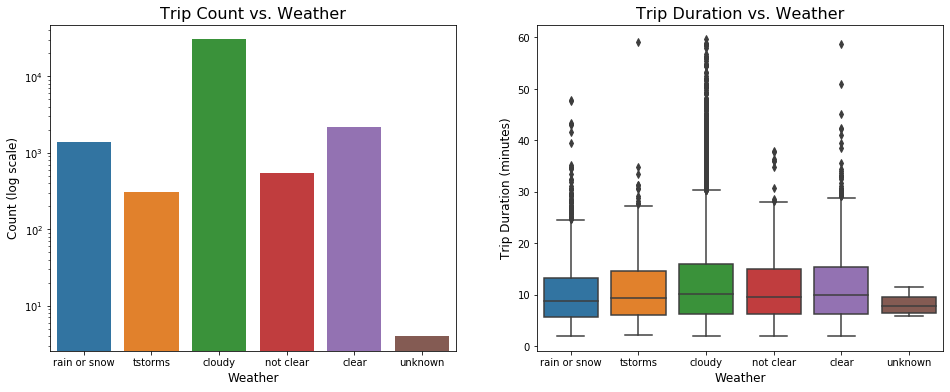

In [6]:
# Trip distribution by weather
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='events', data=df, ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_title('Trip Count vs. Weather', fontsize=16)
ax[0].set_xlabel('Weather', fontsize=12)
ax[0].set_ylabel('Count (log scale)', fontsize=12)
sns.boxplot(x='events', y='tripduration', data=df, ax=ax[1])
ax[1].set_title('Trip Duration vs. Weather', fontsize=16)
ax[1].set_xlabel('Weather', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()



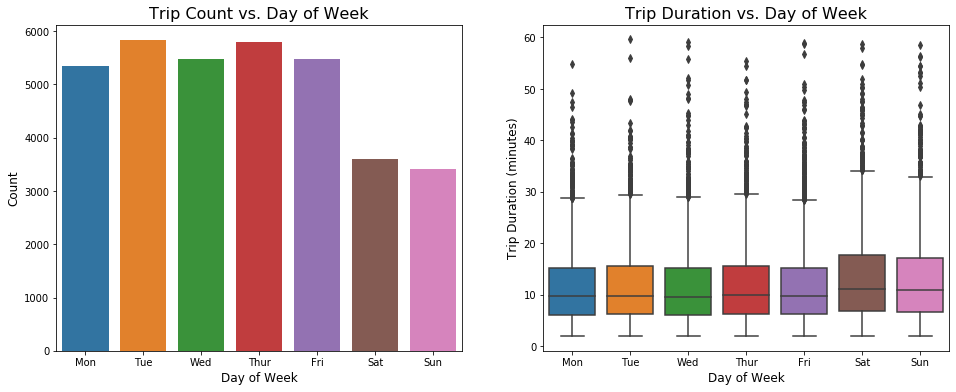

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='day', data=df, ax=ax[0])
ax[0].set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
ax[0].set_title('Trip Count vs. Day of Week', fontsize=16)
ax[0].set_xlabel('Day of Week', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='day', y='tripduration', data=df, ax=ax[1])
ax[1].set_title('Trip Duration vs. Day of Week', fontsize=16)
ax[1].set_xlabel('Day of Week', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
ax[1].set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
plt.show()

In [8]:
X = df.loc[:,['latitude_start','longitude_start']]

Y = df.loc[:,['latitude_end','longitude_end']] 

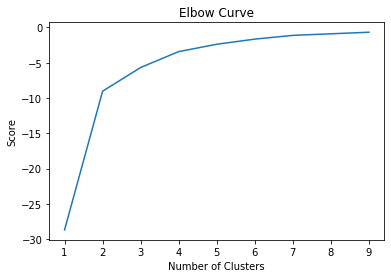

In [9]:
from sklearn.cluster import KMeans #import K Means to find clusters of coordinates

K_clusters = range(1,10) # testing a range of clusters
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['latitude_start']]
X_axis = df[['longitude_start']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# plot to see what the best number of clusters would be
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [10]:
X = df.loc[:,['latitude_start','longitude_start']]

kmeansX = KMeans(n_clusters = 8, random_state=0) # run KMeans on start coordinates with 8 clusters

kmeansX.fit(X) # compute k means

#X['cluster_label'] = kmeansX.fit_predict(X) # create new column with label for the clusters 

X['cluster_label'] = kmeansX.predict(X) # create new column with label for the clusters 

centers = kmeansX.cluster_centers_

#labelX = kmeansX.fit_predict(X) # labels of the points for kmeansX for plotting

X.head(10)

,latitude_start,longitude_start,cluster_label
0,41.865861,-87.646611,2
1,41.899007,-87.629928,1
2,41.935733,-87.663576,0
3,41.973385,-87.668365,4
4,41.918306,-87.636282,5
5,41.918440,-87.652220,5
6,41.932620,-87.642385,0
7,41.912202,-87.634664,5
8,41.883380,-87.641170,1
9,41.883380,-87.641170,1


In [11]:
centers

array([[ 41.93373972, -87.65195875],
       [ 41.88585694, -87.63170052],
       [ 41.87711577, -87.65653616],
       [ 41.79870545, -87.59526724],
       [ 41.95654383, -87.66335143],
       [ 41.91415143, -87.63794492],
       [ 41.90868482, -87.67928632],
       [ 41.85811746, -87.62692142]])

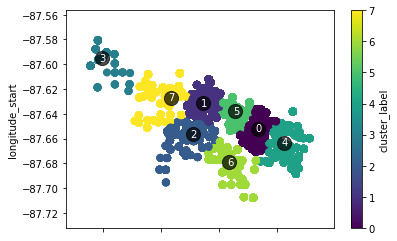

In [12]:
# Plotting clusters for starting points

X.plot.scatter(x = 'latitude_start', y = 'longitude_start', c='cluster_label', s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7)

offset=0.002
for i in np.arange(len(centers)):
    plt.text(centers[i, 0]-offset,centers[i, 1]-offset, i, color='white')

plt.show()

In [13]:
Y = df.loc[:,['latitude_end','longitude_end']] 

kmeansY = KMeans(n_clusters = 8, random_state=0) # run KMeans on start coordinates with 8 clusters

kmeansY.fit(Y) # compute k means

#Y['cluster_label'] = kmeansY.fit_predict(Y) # create new column with label for the clusters 

Y['cluster_label'] = kmeansY.predict(Y) # create new column with label for the clusters 

centersY = kmeansY.cluster_centers_

#labelY = kmeansY.fit_predict(Y) # labels of the points for kmeansX for plotting
Y.head(10)

,latitude_end,longitude_end,cluster_label
0,41.869417,-87.660996,3
1,41.893843,-87.641851,6
2,41.946880,-87.654450,2
3,41.958400,-87.654230,2
4,41.917970,-87.643680,0
5,41.918306,-87.636282,0
6,41.945512,-87.645980,0
7,41.910579,-87.638618,6
8,41.897448,-87.628722,6
9,41.891733,-87.648727,3


In [14]:
centers

array([[ 41.93373972, -87.65195875],
       [ 41.88585694, -87.63170052],
       [ 41.87711577, -87.65653616],
       [ 41.79870545, -87.59526724],
       [ 41.95654383, -87.66335143],
       [ 41.91415143, -87.63794492],
       [ 41.90868482, -87.67928632],
       [ 41.85811746, -87.62692142]])

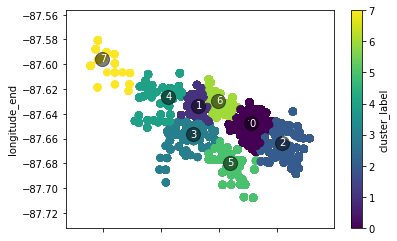

In [15]:
#Plotting clusters for end points

Y.plot.scatter(x = 'latitude_end', y = 'longitude_end', c='cluster_label', s=50, cmap='viridis')
plt.scatter(centersY[:, 0], centersY[:, 1], c='black', s=200, alpha=0.5)

offset=0.002
for i in np.arange(len(centers)):
    plt.text(centersY[i, 0]-offset,centersY[i, 1]-offset, i, color='white')
    
plt.show()

In [16]:
centers

array([[ 41.93373972, -87.65195875],
       [ 41.88585694, -87.63170052],
       [ 41.87711577, -87.65653616],
       [ 41.79870545, -87.59526724],
       [ 41.95654383, -87.66335143],
       [ 41.91415143, -87.63794492],
       [ 41.90868482, -87.67928632],
       [ 41.85811746, -87.62692142]])

In [17]:
#Combining/appending the two cluster results to get clusters for all locations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

df = pd.read_csv('divvysample.csv')


X = df.loc[:,['latitude_start','longitude_start']]
X = X.rename(columns={'latitude_start':'lat', 'longitude_start':'long'})

Y = df.loc[:,['latitude_end','longitude_end']]
Y = Y.rename(columns={'latitude_end':'lat', 'longitude_end':'long'})


# Merge all start and end locations
Allloc = X.append(Y).reset_index(drop=True)
print(Allloc.shape)

# Apply Kmeans to all locations
kmeansAll = KMeans(n_clusters = 8, random_state=0) # run KMeans on start coordinates with 8 clusters

Allloc['cluster_label'] = kmeansAll.fit_predict(Allloc)

centersAll = kmeansAll.cluster_centers_

(69904, 2)


In [18]:
X.head()

,lat,long
0,41.865861,-87.646611
1,41.899007,-87.629928
2,41.935733,-87.663576
3,41.973385,-87.668365
4,41.918306,-87.636282


In [19]:
Y.head()

,lat,long
0,41.869417,-87.660996
1,41.893843,-87.641851
2,41.946880,-87.654450
3,41.958400,-87.654230
4,41.917970,-87.643680


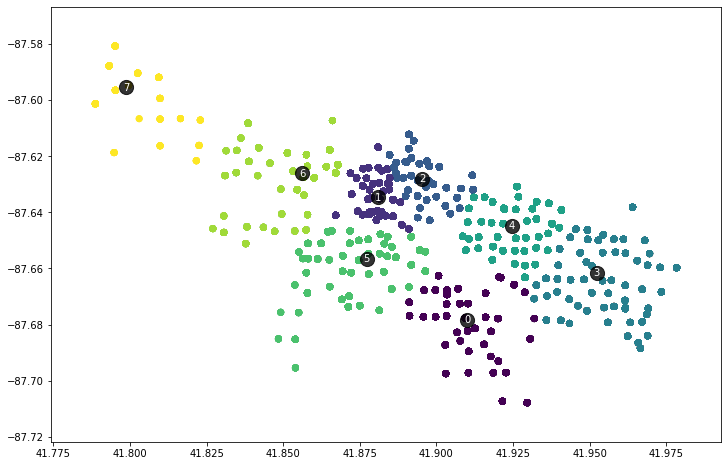

In [20]:
#Plotting out the clusters for combined start and end points

plt.figure(figsize=(12,8))
plt.scatter(Allloc.loc[:,'lat'], Allloc.loc[:,'long'], c=Allloc.loc[:,'cluster_label'], cmap='viridis')
plt.scatter(centersAll[:, 0], centersAll[:, 1], c='black', s=200, alpha=0.8)

offset=0.001
for i in np.arange(len(centersAll)):
    plt.text(centersAll[i, 0]-offset,centersAll[i, 1]-offset, i, color='white')

plt.show()

In [21]:
#Labeling start and end points and entering those into the array

X = df.loc[:,['latitude_start','longitude_start']]
Y = df.loc[:,['latitude_end','longitude_end']]

df['start'] = kmeansAll.predict(X)
df['end'] = kmeansAll.predict(Y)

df[['start','end','trip_id']].groupby(['start','end']).count().unstack()

trip_id                                                      
end         0       1       2       3       4       5      6      7
start                                                              
0      1694.0   301.0   264.0   219.0   395.0   280.0    4.0    NaN
1       386.0  3841.0  2676.0    64.0   566.0  1218.0  712.0    1.0
2       267.0  2661.0  2488.0   220.0  1158.0   324.0  188.0    NaN
3       176.0    46.0   162.0  2922.0   957.0     8.0    1.0    NaN
4       410.0   381.0   949.0  1061.0  2530.0    77.0    6.0    NaN
5       298.0  1192.0   296.0    13.0    85.0  1393.0  124.0    NaN
6         5.0   612.0   148.0     4.0     9.0   135.0  751.0   40.0
7         NaN     6.0     NaN     NaN     NaN     NaN   30.0  198.0

In [22]:
#Encoded object data to be used in model

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
df["gendercode"] = le.fit_transform(df["gender"])
df["usertypecode"] = le.fit_transform(df["usertype"])


In [23]:
#Checking for empty values
df.isnull().sum()

trip_id              0
year                 0
month                0
week                 0
day                  0
hour                 0
usertype             0
gender               0
starttime            0
stoptime             0
tripduration         0
temperature          0
events               0
from_station_id      0
from_station_name    0
latitude_start       0
longitude_start      0
start_coordinates    0
dpcapacity_start     0
to_station_id        0
to_station_name      0
latitude_end         0
longitude_end        0
stop_coordinates     0
dpcapacity_end       0
start                0
end                  0
gendercode           0
usertypecode         0
dtype: int64

In [40]:
# Pipeline and column transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

# Data transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, label_binarize, LabelEncoder

# Learning models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [41]:
#columns

nom_col = ['events']
num_col = ['month','day','gendercode','start','usertypecode']

In [42]:
#Define x & y and show their type

x = df.loc[:, num_col + nom_col]
y = df.loc[:,'end']

print("Data type of predictors X: ", x, x.shape)
print("Data type of target variable Y: ", y, y.shape)

Data type of predictors X:         month  day  gendercode  start  usertypecode        events
0          6    0           1      5             0  rain or snow
1          6    0           1      2             0       tstorms
2          6    0           1      3             0       tstorms
3          6    0           0      3             0       tstorms
4          6    0           1      4             0       tstorms
...      ...  ...         ...    ...           ...           ...
34947      8    4           0      1             0        cloudy
34948      8    4           0      0             0        cloudy
34949      8    4           1      2             0        cloudy
34950      8    4           1      3             0        cloudy
34951      8    4           1      2             0        cloudy

[34952 rows x 6 columns] (34952, 6)
Data type of target variable Y:  0        5
1        2
2        3
3        3
4        4
        ..
34947    1
34948    1
34949    2
34950    3
34951    1
N

In [43]:
#Training Split

from sklearn.model_selection import train_test_split
testsize = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=10)

In [44]:

nom_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))
num_pipe = make_pipeline(make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()))

In [76]:
pipe = make_pipeline(ColumnTransformer([('nom', nom_pipe, nom_col),
                                        ('num', num_pipe, num_col)]), 
                    #DecisionTreeClassifier(criterion='gini', max_depth=20)
                     #LogisticRegression(C=1000, solver='lbfgs', multi_class='ovr')
                     #RandomForestClassifier(criterion='gini', n_estimators=200, random_state=1, max_depth=30, n_jobs=2)
                     #KNeighborsClassifier(n_neighbors=5, p=2)
                     SVC(kernel='rbf', C=10, gamma=0.1)
                    )


In [77]:
pipe.fit(x_train, y_train)
print('Training score:', pipe.score(x_train,y_train))

Training score: 0.47359601079048474


In [78]:
pipe.fit(x_test, y_test)
print('Test score:', pipe.score(x_test,y_test))

Test score: 0.47453747854281897
